In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import sys
import os
sys.path.append('.')
os.environ["CUDA_VISIBLE_DEVICES"] = "0"



In [2]:
from research.detection.kernel import Kernel  # noqa: E402



Using TensorFlow backend.


In [3]:
# 训练模型
# all/heads：训练整个网络/网络尾部 详见declaration
# epoch：目标迭代轮数，注意不是训练多少轮
# k = Kernel()
# k.build('training')
# # k.load_weights(special='coco')
# k.load_weights('data/__cache__/detection/__logs__/' +
#                'detection20190509T1729/mask_rcnn_detection_1600.h5')
# k.train(epoch=2400, layers='all')
# k.train(epoch=1600, learning_rate_coefficient=1, layers='heads')



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                43
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

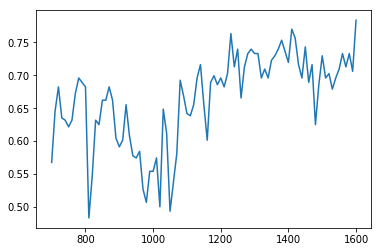

In [5]:
# 读取训练模型并评估
import matplotlib.pyplot as plt  # noqa： E402
import numpy as np  # noqa： E402

k = Kernel()
k.build('inference')
prefix = 'data/__cache__/detection/__logs__/detection20190509T1729'

x = np.arange(700, 1601)
x = [x_i for x_i in x if x_i % 10 == 0]

y = []
for i in x:
    mid = str(i).zfill(4)
    k.load_weights(path=f'{prefix}/mask_rcnn_detection_{mid}.h5')
    y.append(k.eval())
plt.plot(x, y)
# 下面行不写会出现 [<matplotlib.lines.Line2D at 0x111814390>] 字样
plt.show()


In [7]:
curv = zip(x,y)
for x in curv:
  print(x)
  


(700, 0.5675675675675675)
(710, 0.6452702702702703)
(720, 0.6824324324324325)
(730, 0.6351351351351351)
(740, 0.6317567567567568)
(750, 0.6216216216216216)
(760, 0.6317567567567568)
(770, 0.6722972972972973)
(780, 0.6959459459459459)
(790, 0.6891891891891891)
(800, 0.6824324324324325)
(810, 0.4831081081081081)
(820, 0.5472972972972973)
(830, 0.6317567567567568)
(840, 0.625)
(850, 0.6621621621621622)
(860, 0.6621621621621622)
(870, 0.6824324324324325)
(880, 0.6621621621621622)
(890, 0.6047297297297297)
(900, 0.5912162162162162)
(910, 0.6013513513513513)
(920, 0.6554054054054054)
(930, 0.6081081081081081)
(940, 0.5777027027027027)
(950, 0.5743243243243243)
(960, 0.5844594594594594)
(970, 0.527027027027027)
(980, 0.5067567567567568)
(990, 0.5540540540540541)
(1000, 0.5540540540540541)
(1010, 0.5743243243243243)
(1020, 0.5)
(1030, 0.6486486486486487)
(1040, 0.6114864864864865)
(1050, 0.49324324324324326)
(1060, 0.5371621621621622)
(1070, 0.581081081081081)
(1080, 0.6925675675675675)
(1090,